In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.mixture import GaussianMixture
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('qb2018.xlsx')
df['TD/G'] = df['TD'] / df['G']

In [3]:
df.head()

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD,TD/G
0,1,Ben Roethlisberger,PIT,36,QB,16,16,2001-09-06 00:00:00,452,675,...,96.5,73.0,24,166,7.10,7.04,3.4,2.0,3.0,2.1250
1,2,Andrew Luck*,IND,29,QB,16,16,2000-10-06 00:00:00,430,639,...,98.7,71.5,18,134,6.79,6.95,2.7,3.0,3.0,2.4375
2,3,Matt Ryan,ATL,33,QB,16,16,2000-07-09 00:00:00,422,608,...,108.1,70.6,42,296,7.12,7.71,6.5,1.0,1.0,2.1875
3,4,Kirk Cousins,MIN,30,QB,16,16,2001-08-07 00:00:00,425,606,...,99.7,60.6,40,262,6.25,6.48,6.2,1.0,0.0,1.8750
4,5,Aaron Rodgers*,GNB,35,QB,16,16,2001-06-09 00:00:00,372,597,...,97.6,56.8,49,353,6.33,6.96,7.6,3.0,3.0,1.5625


In [4]:
df.columns

Index(['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD', 'TD/G'],
      dtype='object')

In [5]:
df.tail()

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD,TD/G
101,102,Logan Thomas,BUF,27,te,12,3,NaN,1,1,...,118.7,NaN,0,0,15.0,15.0,0.0,NaN,NaN,0.000000
102,103,Colby Wadman,DEN,23,P,12,0,NaN,1,1,...,116.7,NaN,0,0,12.0,12.0,0.0,NaN,NaN,0.000000
103,104,Tress Way,WAS,28,P,16,0,NaN,1,1,...,95.8,NaN,0,0,7.0,7.0,0.0,NaN,NaN,0.000000
104,105,Dede Westbrook,JAX,25,WR,16,9,NaN,0,1,...,39.6,11.1,0,0,0.0,0.0,0.0,NaN,NaN,0.000000
105,106,Albert Wilson,MIA,26,wr,7,3,NaN,1,1,...,158.3,99.7,0,0,52.0,72.0,0.0,NaN,NaN,0.142857


In [6]:
df = df.fillna(0)
df.tail()

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD,TD/G
101,102,Logan Thomas,BUF,27,te,12,3,0,1,1,...,118.7,0.0,0,0,15.0,15.0,0.0,0.0,0.0,0.000000
102,103,Colby Wadman,DEN,23,P,12,0,0,1,1,...,116.7,0.0,0,0,12.0,12.0,0.0,0.0,0.0,0.000000
103,104,Tress Way,WAS,28,P,16,0,0,1,1,...,95.8,0.0,0,0,7.0,7.0,0.0,0.0,0.0,0.000000
104,105,Dede Westbrook,JAX,25,WR,16,9,0,0,1,...,39.6,11.1,0,0,0.0,0.0,0.0,0.0,0.0,0.000000
105,106,Albert Wilson,MIA,26,wr,7,3,0,1,1,...,158.3,99.7,0,0,52.0,72.0,0.0,0.0,0.0,0.142857


### Cluster 2018 QBs into Tiers

In [7]:
X = df[['Rk','G', 'GS', 'Cmp', 'Att','Cmp%', 'Yds', 'TD', 'TD%', 
        'Int', 'Int%', 'Lng', 'Y/A', 'AY/A', 'Y/C','Y/G', 'Rate',
        'QBR', 'Sk', 'Yds.1', 'NY/A', 'ANY/A', 'Sk%', '4QC','GWD', 'TD/G']].values
lowest_bic = np.infty
lowest_aic = np.infty
bic = []
aic = []
n_components_range = range(1, 11)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type,random_state=42)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        aic.append(gmm.aic(X))
        if bic[-1] < lowest_bic and aic[-1] < lowest_aic:
            lowest_bic = bic[-1]
            lowest_aic = aic[-1]
            best_gmm = gmm
            
best_gmm.fit(X)
tier = best_gmm.predict(X)
df['tier'] = tier

In [8]:
l = []
for item in tier:
    if item not in l:
        l.append(item)
tier_ranks = []
for i in range(len(np.unique(tier))):
    tier_ranks.append((i,l[i]))
tier_ranks = sorted(tier_ranks, key=lambda tup: tup[1])
ordered_ranks = list(i+1 for i in range(len(tier_ranks)))
ordered_ranking = []
for i in tier:
    loc = l.index(i)
    ordered_ranking.append(ordered_ranks[loc])
    
df['tier'] = ordered_ranking

In [9]:
df['tier_min_y/g'] = df.groupby('tier')['Y/G'].transform('min')
df['tier_avg_y/g'] = df.groupby('tier')['Y/G'].transform('mean')
df['tier_max_y/g'] = df.groupby('tier')['Y/G'].transform('max')
df['tier_min_td/g'] = df.groupby('tier')['TD/G'].transform('min')
df['tier_avg_td/g'] = df.groupby('tier')['TD/G'].transform('mean')
df['tier_max_td/g'] = df.groupby('tier')['TD/G'].transform('max')

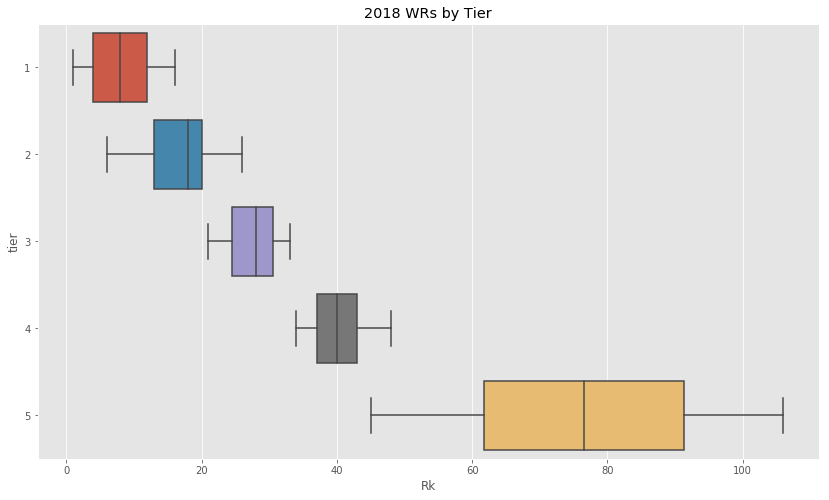

In [10]:
plt.figure(figsize=(14,8))
plt.title("2018 WRs by Tier")
ax = sns.boxplot(data=df, x='Rk', y='tier', orient="h")

### Upload Week 1 Rankings

In [11]:
df2 = pd.read_csv('2019_wk_1_qb.csv')
df2 = df2.drop(['Tier','WSIS'],axis=1)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
Rank            40 non-null float64
Quarterbacks    40 non-null object
Team            40 non-null object
Opp             40 non-null object
Best            40 non-null float64
Worst           40 non-null float64
Avg             40 non-null float64
Std Dev         40 non-null float64
dtypes: float64(5), object(3)
memory usage: 2.7+ KB


In [13]:
df2.tail()

,Rank,Quarterbacks,Team,Opp,Best,Worst,Avg,Std Dev
37,38.0,Blake Bortles,LAR,at CAR,35.0,39.0,37.5,1.5
38,39.0,Tyrod Taylor,LAC,vs. IND,36.0,41.0,38.6,1.6
39,40.0,Robert Griffin,BAL,at MIA,37.0,43.0,40.0,2.1
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df2 = df2[0:40]

In [15]:
X = df2[['Rank','Best', 'Worst', 'Avg','Std Dev']].values
lowest_bic = np.infty
lowest_aic = np.infty
bic = []
aic = []
n_components_range = range(1, 11)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type,random_state=42)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        aic.append(gmm.aic(X))
        if bic[-1] < lowest_bic and aic[-1] < lowest_aic:
            lowest_bic = bic[-1]
            lowest_aic = aic[-1]
            best_gmm = gmm
best_gmm.fit(X)
tier = best_gmm.predict(X)
df2['tier'] = tier

l = []
for item in tier:
    if item not in l:
        l.append(item)

tier_ranks = []
for i in range(len(np.unique(tier))):
    tier_ranks.append((i,l[i]))
tier_ranks = sorted(tier_ranks, key=lambda tup: tup[1])    
ordered_ranks = list(i+1 for i in range(len(tier_ranks)))
ordered_ranking = []
for i in tier:
    loc = l.index(i)
    ordered_ranking.append(ordered_ranks[loc])
df2['tier'] = ordered_ranking

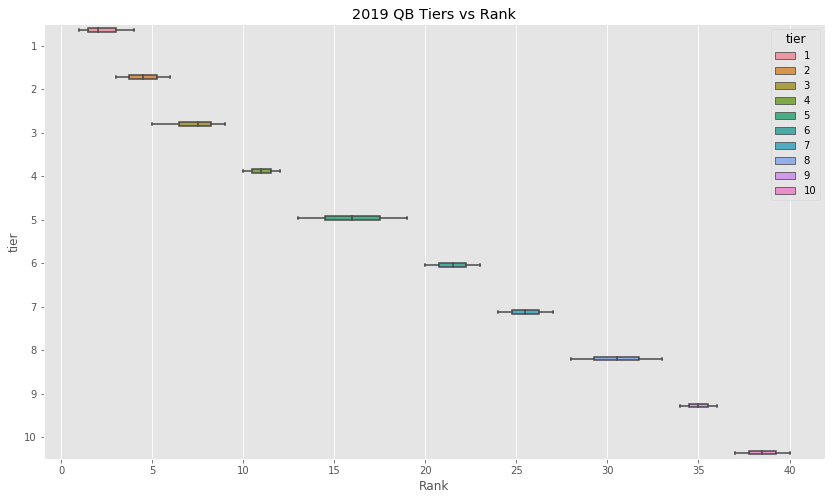

In [16]:
plt.figure(figsize=(14,8))
plt.title("2019 QB Tiers vs Rank")
ax = sns.boxplot(data=df2, x='Rank', y='tier', hue='tier', orient="h")

### Use the 2018 Tier Stats to Create Fantasy Point Projection Ranges

In [17]:
final = df.drop_duplicates('tier')
final = final[['tier','tier_min_y/g','tier_avg_y/g','tier_max_y/g',
               'tier_min_td/g', 'tier_avg_td/g','tier_max_td/g']]

In [18]:
final['fp_min'] = (final['tier_min_y/g'] / 10) + (final['tier_min_td/g'] * 6) 
final['fp_avg'] = (final['tier_avg_y/g'] / 10) + (final['tier_avg_td/g'] * 6) 
final['fp_max'] = (final['tier_max_y/g'] / 10) + (final['tier_max_td/g'] * 6) 
final = final.reset_index(drop=True)

In [19]:
proj = pd.DataFrame(columns=['Quarterbacks','Team','Opp'])
for t in final.tier.values:
    temp = df2[df2['tier'] == t]
    temp = temp.reset_index(drop=True)
    temp['fp_min'] = final.loc[t-1]['fp_min']
    temp['fp_avg'] = final.loc[t-1]['fp_avg']
    temp['fp_max'] = final.loc[t-1]['fp_max']
    proj = pd.concat([proj,temp],sort=False)

In [20]:
proj = proj[['Quarterbacks', 'Team', 'Opp', 'tier', 'fp_min', 'fp_avg', 'fp_max']]
proj = proj.reset_index(drop=True)

In [21]:
proj.head()

,Quarterbacks,Team,Opp,tier,fp_min,fp_avg,fp_max
0,Deshaun Watson,HOU,at NO,1.0,32.435,39.892308,50.810
1,Patrick Mahomes,KC,at JAC,1.0,32.435,39.892308,50.810
2,Jameis Winston,TB,vs. SF,1.0,32.435,39.892308,50.810
3,Drew Brees,NO,vs. HOU,2.0,28.300,34.749004,41.075
4,Baker Mayfield,CLE,vs. TEN,2.0,28.300,34.749004,41.075


In [22]:
proj.to_csv('qb_wk1_proj.csv',index=False)